## Comparison between Direct Path and Evolutionary Algorithm

In [ ]:
import matplotlib.pyplot as plt
import RNA
import random
import numpy as np
import pandas as pd
import seaborn as sns
import time

import src.rna_structure as rs
import src.evolution as ev
import src.path_finding as pf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
def plot_energy_profiles(seq, start_struct, end_struct, evolutionary_path, direct_path, indirect_path):
    """
    Plot energy profiles for both evolutionary and direct paths
    
    Args:
        seq: RNA sequence
        start_struct: Starting structure in dot-bracket notation
        end_struct: Target structure in dot-bracket notation
        evolutionary_path: List of structures from evolutionary algorithm
        direct_path: List of structures from direct path
    """
    fc = RNA.fold_compound(seq)
    
    # Calculate energies for evolutionary path
    evo_energies = [fc.eval_structure(struct) for struct in evolutionary_path]
    evo_steps = range(len(evo_energies))
    
    # Calculate energies for direct path
    direct_energies = [fc.eval_structure(struct) for struct in direct_path]
    direct_steps = range(len(direct_energies))

    # Calculate energies for indirect path
    indirect_energies = [fc.eval_structure(struct) for struct in indirect_path]
    indirect_steps = range(len(indirect_energies))
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(evo_steps, evo_energies, 'b-', label='Evolutionary Path')
    plt.plot(direct_steps, direct_energies, 'r--', label='Direct Path')
    plt.plot(indirect_steps, indirect_energies, 'g--', label='Indirect Path')

    
    # Add labels and title
    plt.xlabel('Step')
    plt.ylabel('Energy (kcal/mol)')
    plt.title('Energy Profiles Comparison')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()
    
    # Print some statistics
    print(f"Evolutionary Path:")
    print(f"- Initial energy: {evo_energies[0]:.2f} kcal/mol")
    print(f"- Final energy: {evo_energies[-1]:.2f} kcal/mol")
    print(f"- Maximum energy: {max(evo_energies):.2f} kcal/mol")
    print(f"- Energy barrier: {max(evo_energies) - evo_energies[0]:.2f} kcal/mol")
    print(f"- Path length: {len(evo_energies)} steps")
    
    print(f"\nDirect Path:")
    print(f"- Initial energy: {direct_energies[0]:.2f} kcal/mol")
    print(f"- Final energy: {direct_energies[-1]:.2f} kcal/mol")
    print(f"- Maximum energy: {max(direct_energies):.2f} kcal/mol")
    print(f"- Energy barrier: {max(direct_energies) - direct_energies[0]:.2f} kcal/mol")
    print(f"- Path length: {len(direct_energies)} steps")

    print(f"\nIndirect Path:")
    print(f"- Initial energy: {indirect_energies[0]:.2f} kcal/mol")
    print(f"- Final energy: {indirect_energies[-1]:.2f} kcal/mol")
    print(f"- Maximum energy: {max(indirect_energies):.2f} kcal/mol")
    print(f"- Energy barrier: {max(indirect_energies) - indirect_energies[0]:.2f} kcal/mol")
    print(f"- Path length: {len(indirect_energies)} steps")

Base pair distance between structures: 4
Starting indirect path attempt 1/3
Attempt 1: path length = 11, energy barrier = 0.00
New best barrier: 0.00
Starting indirect path attempt 2/3
Attempt 2: path length = 19, energy barrier = 2.50
Starting indirect path attempt 3/3
Attempt 3: path length = 17, energy barrier = 99993.60


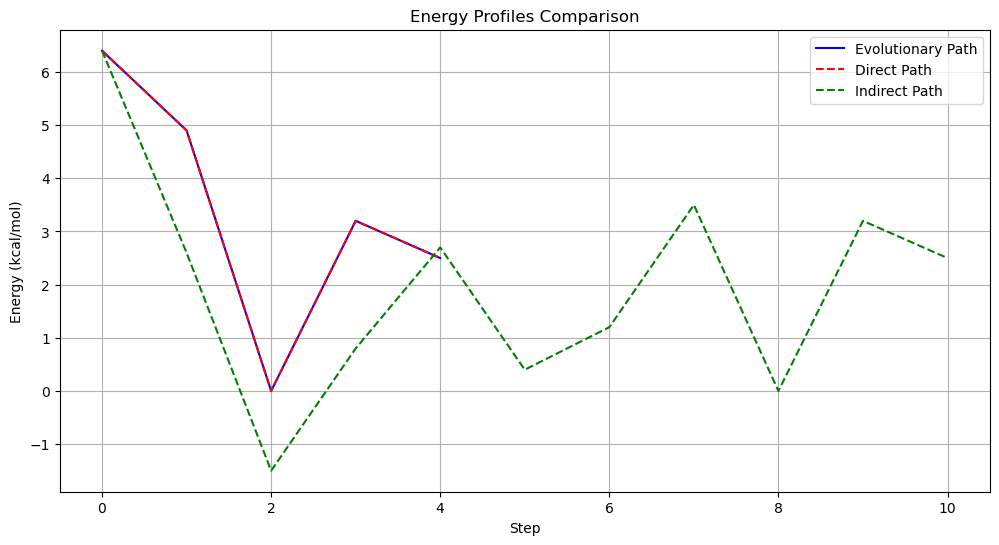

Evolutionary Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.40 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 5 steps

Direct Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.40 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 5 steps

Indirect Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.40 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 11 steps


In [31]:
# Example usage
seq = "GGGGAAACUCC"
start_struct = "(..(...)..)"
end_struct = "...((...))."

# Get direct path
start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=100, max_steps=100)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, start_struct, end_struct, evolutionary_path, direct_path, indirect_path)

Base pair distance between structures: 21
Starting indirect path attempt 1/5
Attempt 1: path length = 34, energy barrier = 99979.30
New best barrier: 99979.30
Starting indirect path attempt 2/5
Attempt 2: path length = 576, energy barrier = 199997.50
Starting indirect path attempt 3/5
Attempt 3: path length = 1214, energy barrier = 299981.81
Starting indirect path attempt 4/5
Attempt 4: path length = 656, energy barrier = 299978.91
Starting indirect path attempt 5/5
Attempt 5: path length = 40, energy barrier = 0.00
New best barrier: 0.00

Generation 10:
{'structure': '.................(..((........)).............(((((((.......)))))))........).......', 'distance': 24, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '................................................(.............)...................', '...............................................((.............))..................', '..................................

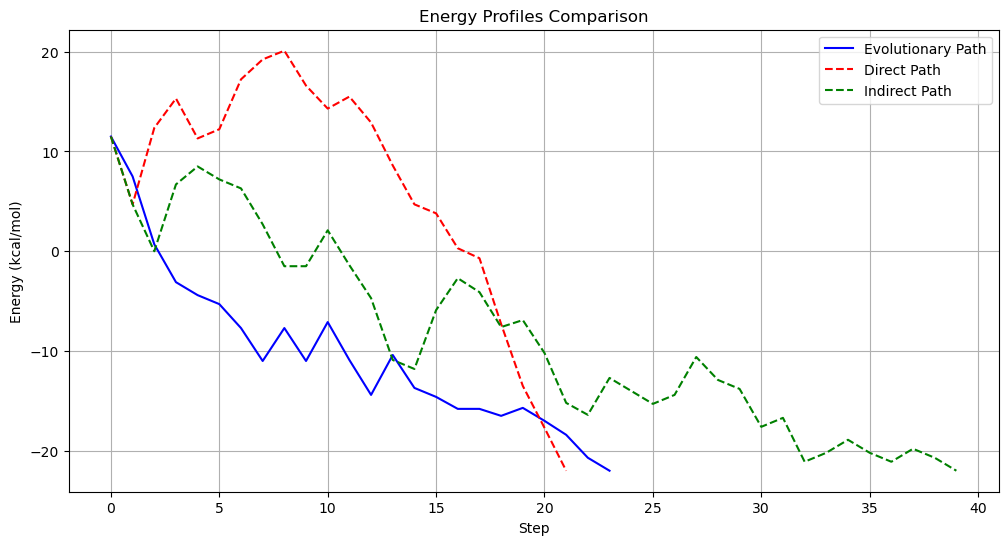

Evolutionary Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 11.50 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 24 steps

Direct Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 20.10 kcal/mol
- Energy barrier: 8.60 kcal/mol
- Path length: 22 steps

Indirect Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 11.50 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 40 steps


In [32]:
# Example usage
seq = "ACACGACCUCAUAUAAUCUUGGGAAUAUGGCCCAUAAGUUUCUACCCGGCAACCGUAAAUUGCCGGACUAUGCAGGGAAGUG"
start_struct = "......................(....................)....(.............)..................."
end_struct = ".(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))"  # target structure

# Get direct path
start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=200, max_steps=50)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, start_struct, end_struct, evolutionary_path, direct_path, indirect_path)